# Desafio - Mutual

---
Olá, Mutual! Meu nome é Patrick Gomes e essa é minha resolução do desafio para o processo seletivo de estágio.

Deixarei aqui minhas redes com projetos em ciência de dados:

[Linkedin](https://www.linkedin.com/in/patotricks15/)|
[Kaggle](https://www.kaggle.com/patrickgomes)|
[Github](https://github.com/Patotricks15)|
[Medium](https://patotricks15.medium.com/)

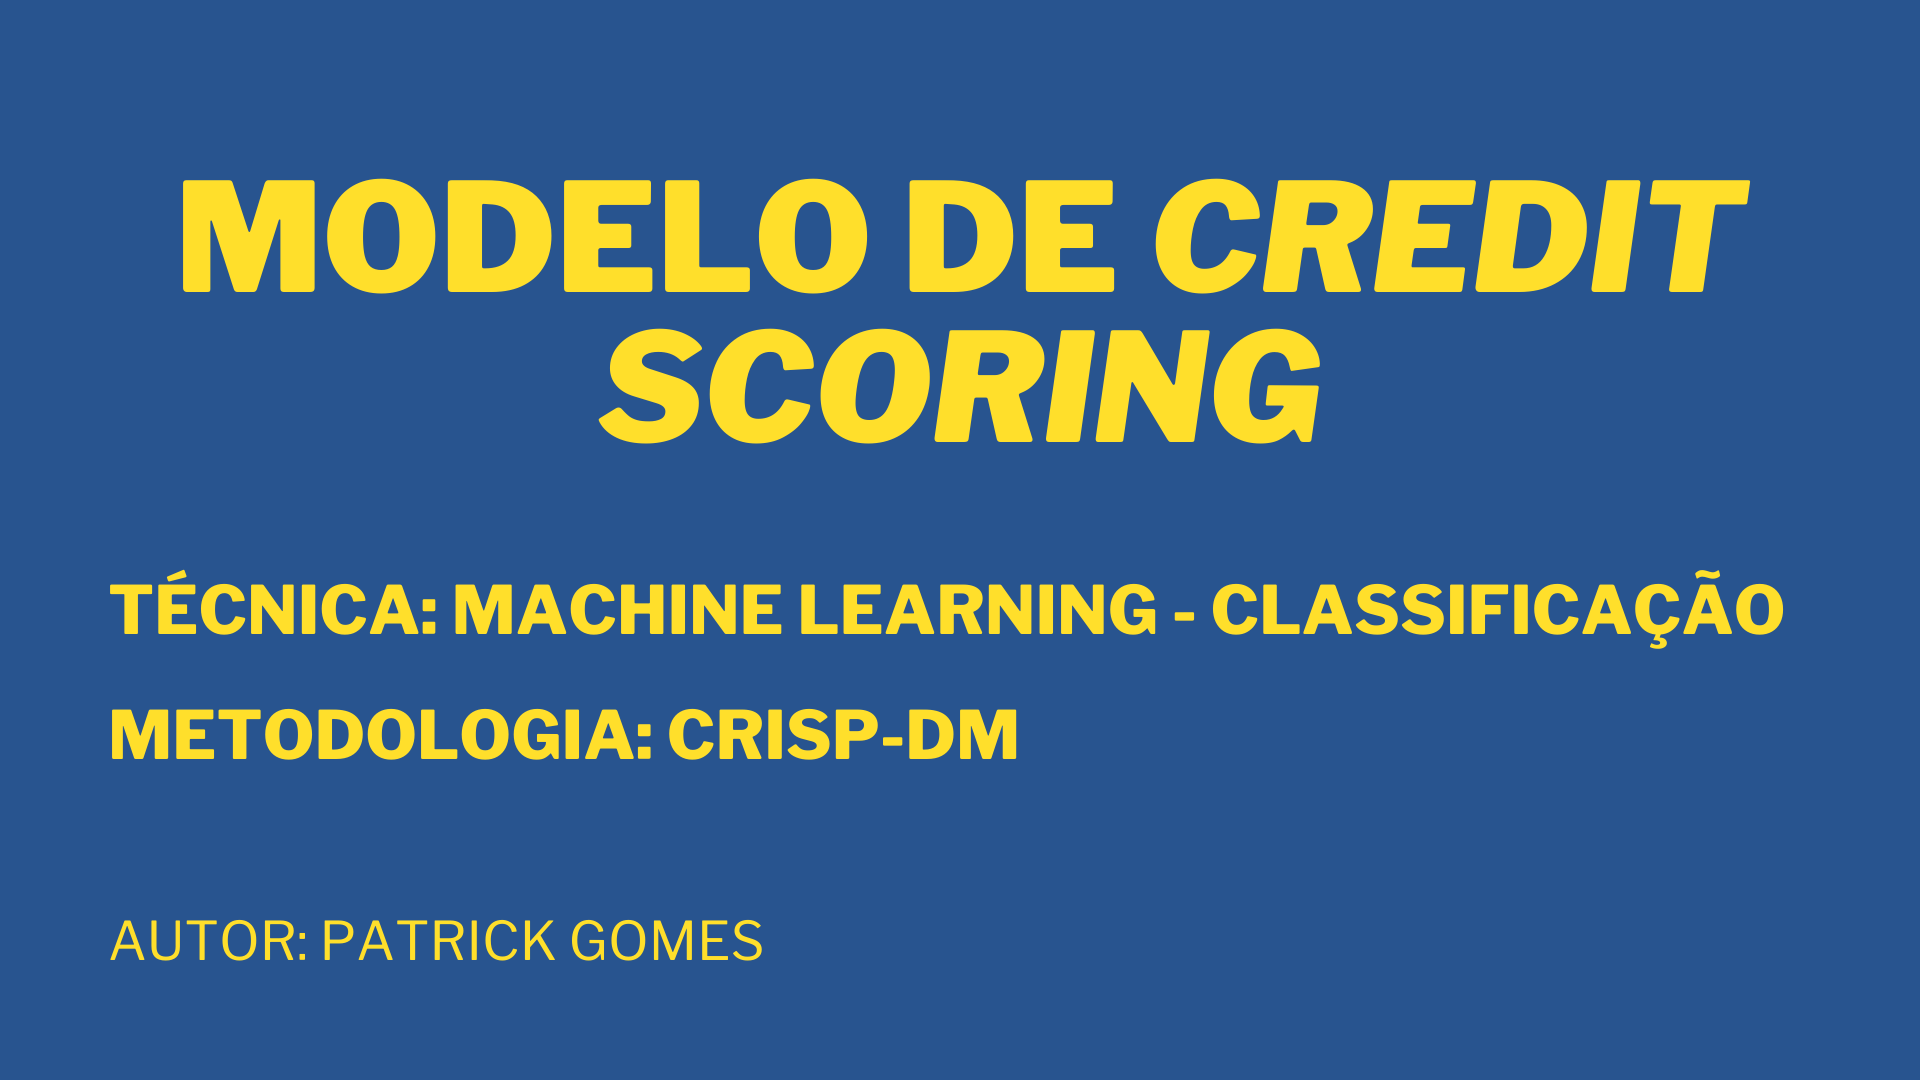

# Introdução

---
Esse notebook é a resolução do desafio para a empresa Mutual. Nele, precisamos classificar se os clientes serão inadimplentes ou não.

O desenvolvimento desse notebook foi seguindo a metodologia CRISP-DM.A maneira que escolhi para classificar os clientes foi a aplicação do modelo GradientBoostingClassifier, pois as métricas se mostraram melhores ao utilizar esse modelo. Os modelos escolhidos para análise foram: Regressão logística, floresta aleatória, support vector machine e GradientBoostingClassifier

## Metodologia

---
CRISP DM é a abreviação de **Cross Industry Standard Process for Data Mining** que, trazendo para o português, pode ser entendida como processo padrão da indústria cruzada para mineração de dados. Essa é uma metodologia capaz de transformar os dados da empresa em conhecimento e informações de gerenciamento.

As etapas da metodologia são: Entendimento do problema, Compreensão dos dados, Preparação dos dados, Modelagem, Avaliação

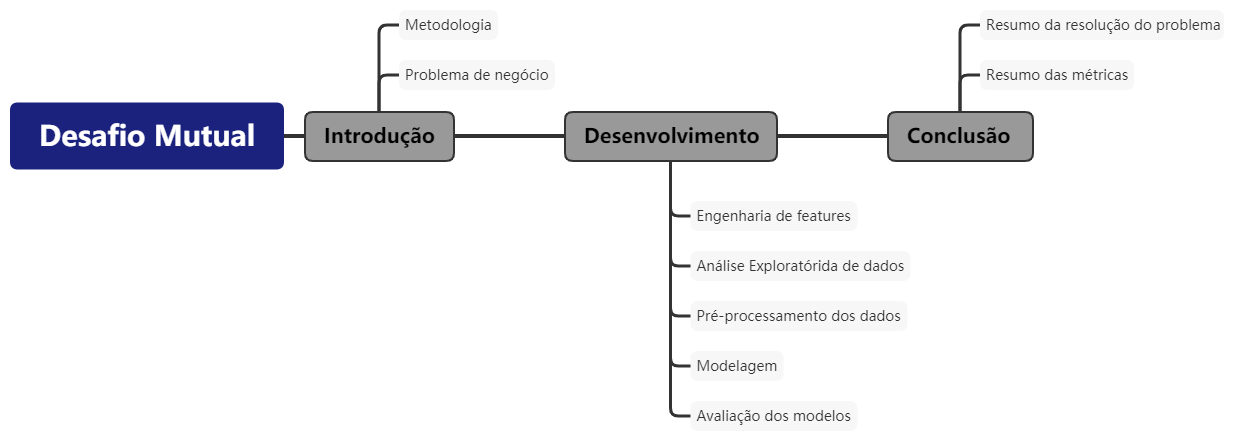


Na primeira sessão explicaremos sobre credit scoring, que é o objetivo do desafio. Aqui faremos uma abordagem teórica sobre o tema, explicando o que é, para que serve, e elaborando o problema de negócio relacionado ao desafio

Na segunda sessão desenvolveremos a análise e a modelagem dos dados. Primeiro utilizaremos diversos métodos para investigar os dados, desde a descrição até a correlação e plotagem de gráficos. Depois aplicaremos modelos nesses dados, avaliando métricas para selecionar o mais adequado. Por último vamos simular um novo cliente para classificá-lo.

Na terceira sessão concluiremos com considerações finais sobre o modelo melhor avaliado e os principais resultados.

## Problema de negócio

---

**O que é credit scoring?**

O Credit Score é uma medida feita pelos bancos ou financeiras para medir os riscos em disponibilizar algum crédito, analisando o histórico e características da pessoa que solicitou o empréstimo.

**Para que serve?**

Esta pontuação de crédito é utilizada para perceber se o tomador de crédito possar ser um potencial inadimplente no reembolso do dinheiro emprestado. É uma importante ferramenta para as empresas fornecedoras de crédito, pois conceder crédito para quem um possível inadimplente trará prejuízos para a empresa, e não conceder crédito para possíveis não-inadimplentes pode atrapalhar a relação da empresa com o mercado, e prejudicar a relação com o consumidor a longo prazo



# Desenvolvimento

---
É nessa etapa que vamos focar nossos esforços. Para ficar mais organizado, dividiremos nos seguintes tópicos:

* Engenharia de features
* Análise Exploratória
* Pré-processamento
* Aplicação e avaliação dos modelos
* Simulando um novo cliente

## Engenharia de features

---
Aqui iremos ler, tratar e fazer as alterações nos nossos dados. Isso serve para que consigamos fazer uma melhor análise exploratória e facilitar o pré-processamento. Aqui, retiramos as variáveis que não nos servem



Importando as bibliotecas necessárias

In [51]:
#Manipulação e análise exploratória
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Pré-processamento
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler, SMOTE

#Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier, RandomTreesEmbedding
!pip install scikit-plot -q
import scikitplot as skplt
from sklearn import svm, tree

#Métricas
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, plot_roc_curve, classification_report

#Outros
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Definindo tema do Seaborn
sns.set_theme('paper')

Lendo e manipulando os dados

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/Patotricks15/Ciencia-de-dados-projetos/master/MutualClients.csv')
df.rename(columns={'Unnamed: 0':'Id'}, inplace=True) #Renomeando a coluna
df.set_index('Id', inplace=True,) #Colocando-a como índice
df.head()

,clientId,shopId,gender,maritalStatus,age,numberOfDependents,education,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,shopRank,residenceType,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,quantityBankingAccounts,flagMobilePhone,flagContactPhone,personalNetIncome,codeApplicationBooth,BAD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,N,N,300.0,0,0
2,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,N,N,304.0,0,0
3,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,N,N,250.0,0,0
4,6,24,M,S,26,0,NaN,N,31,28,0,P,180,Y,Y,N,Y,0,999,0.0,Y,N,0,N,N,800.0,0,0
5,7,55,F,S,22,0,NaN,Y,31,12,0,A,0,Y,Y,Y,Y,48,999,0.0,Y,N,0,N,N,410.0,0,0


Vendo o tamanho do dataframe

In [53]:
df.shape

(40000, 28)

Podemos, com uma linha, verificar as informações sobre o dataframe

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1 to 40000
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   clientId                              40000 non-null  int64  
 1   shopId                                40000 non-null  int64  
 2   gender                                39997 non-null  object 
 3   maritalStatus                         40000 non-null  object 
 4   age                                   40000 non-null  int64  
 5   numberOfDependents                    40000 non-null  int64  
 6   education                             0 non-null      float64
 7   flagResidencialPhone                  40000 non-null  object 
 8   areaCodeResidencialPhone              40000 non-null  int64  
 9   bestPaymentDay                        40000 non-null  int64  
 10  shopRank                              40000 non-null  int64  
 11  residenceType  

Com essa informação sobre os dados, podemos observar que as únicas coluna com valores nulos é a "gender" e a "education", então em breve iremos tratá-las, cada uma de uma maneira diferente.

Agora vamos verificar como estão distribuídas as variáveis do conjunto de dados. Para isso utilizaremos o **value_counts()**, que nos retornará os valores únicos e suas respectivas quantidades

In [55]:
for i in df.columns:
  print(df[i].value_counts())

4094     1
36123    1
32037    1
29988    1
19747    1
        ..
2580     1
14866    1
8721     1
10768    1
4098     1
Name: clientId, Length: 40000, dtype: int64
25    5356
22    3914
24    3502
55    3409
23    2375
20    1811
1     1616
12    1551
15    1542
19    1384
3     1356
10    1294
16    1230
21    1006
11     993
9      986
17     961
7      680
18     650
2      616
13     595
6      577
4      540
14     503
5      503
8      489
66     371
96     179
81       5
50       5
77       1
Name: shopId, dtype: int64
F    27903
M    12094
Name: gender, dtype: int64
S    20375
C    13721
O     2220
V     1961
D     1723
Name: maritalStatus, dtype: int64
20    2022
19    2007
21    1808
22    1567
18    1486
      ... 
82       6
15       5
88       2
84       1
86       1
Name: age, Length: 72, dtype: int64
0    40000
Name: numberOfDependents, dtype: int64
Series([], Name: education, dtype: int64)
Y    32649
N     7351
Name: flagResidencialPhone, dtype: int64
31    28080
50   

**Excluindo variáveis**

As variáveis escolhidas para serem retiradas foram aquelas onde tinham muitos valores nulos e as que possuíam apenas um valor

In [56]:
df.drop(columns=['shopId','education', 'flagOtherCard',
      'quantityBankingAccounts', 'flagMobilePhone', 'flagContactPhone', 'numberOfDependents','codeApplicationBooth'], inplace=True)

**Preenchendo os dados nulos**

Vimos nas informações gerais que a coluna "gender" é a única que possui valores nulos, então a preencheremos com o valor da **moda** (A moda trata do valor que ocorre com maior frequência ou o valor mais comum em um conjunto de dados.)

In [57]:
df.fillna(df['gender'].mode()[0], inplace=True)

**Filtrando dados**

Agora selecionaremos alguns dados para serem filtrados. Isso porque existem algumas variáveis com quantidades muito baixas em alguns valores, tornando-se irrelevantes.

In [58]:
mask = df[df['areaCodeResidencialPhone'] >= 10].index
df = df.loc[mask]


In [59]:
mask = df[df['monthsInResidence'] >= 12].index
df = df.loc[mask]

In [60]:
mask = df[df['areaCodeResidencialPhone'] >= 10].index
df = df.loc[mask]

In [61]:
mask = df[df['monthsInTheJob'] >=12].index
df = df.loc[mask]

In [62]:
mask = df[df['professionCode'] >= 100].index
df = df.loc[mask]

In [63]:
mask = df[df['personalNetIncome'] >= 10].index
df = df.loc[mask]

Revendo o tamanho do dataframe

In [163]:
print(f'Agora nosso dataframe possui: {df.shape[0]} linhas e {df.shape[1]} colunas\nForam excluídas, então {40000 - df.shape[0]}')

Agora nosso dataframe possui: 22121 linhas e 20 colunas
Foram excluídas, então 17879


Verificando as colunas restantes, as que serão utilizadas para a modelagem

In [65]:
df.columns

Index(['clientId', 'gender', 'maritalStatus', 'age', 'flagResidencialPhone',
       'areaCodeResidencialPhone', 'bestPaymentDay', 'shopRank',
       'residenceType', 'monthsInResidence', 'flagMothersName',
       'flagFathersName', 'flagResidenceTown_WorkingTown',
       'flagResidenceState_WorkingState', 'monthsInTheJob', 'professionCode',
       'mateIncome', 'flagResidencialAddress_PostalAddress',
       'personalNetIncome', 'BAD'],
      dtype='object')

Verificando, novamente as informações do dataframe, agora limpo e organizado

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22121 entries, 1 to 39999
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   clientId                              22121 non-null  int64  
 1   gender                                22121 non-null  object 
 2   maritalStatus                         22121 non-null  object 
 3   age                                   22121 non-null  int64  
 4   flagResidencialPhone                  22121 non-null  object 
 5   areaCodeResidencialPhone              22121 non-null  int64  
 6   bestPaymentDay                        22121 non-null  int64  
 7   shopRank                              22121 non-null  int64  
 8   residenceType                         22121 non-null  object 
 9   monthsInResidence                     22121 non-null  int64  
 10  flagMothersName                       22121 non-null  object 
 11  flagFathersName

## Análise Exploratória de Dados

---
A Análise Exploratória é a fase onde vamos investigar como os dados estão distribuídos, verificar correlações e estatísticas descritivas. É uma etapa muito importante para a resolução de um problema, pois nela obtemos informações importantes sobre os dados e como eles estão organizados.

### Estatísticas descritivas

Com uma função conseguimos exibir as principais estatísticas descritivas, como: **Quantidade, média, desvio padrão, quartis, mediana, valor mínimo e valor máximo**

In [67]:
df.describe()

,clientId,age,areaCodeResidencialPhone,bestPaymentDay,shopRank,monthsInResidence,monthsInTheJob,professionCode,mateIncome,personalNetIncome,BAD
count,22121.000000,22121.000000,22121.000000,22121.000000,22121.000000,22121.000000,22121.000000,22121.000000,22121.000000,2.212100e+04,22121.000000
mean,24965.389901,34.420234,35.339225,15.383798,0.012658,153.742778,66.996248,617.292347,39.713093,1.013978e+04,0.199991
std,14404.522194,11.840634,8.278052,7.214924,0.191885,135.001104,79.741082,325.593417,316.020569,4.833671e+05,0.400002
min,2.000000,15.000000,10.000000,1.000000,0.000000,12.000000,12.000000,100.000000,0.000000,1.000000e+01,0.000000
25%,12433.000000,24.000000,31.000000,8.000000,0.000000,36.000000,12.000000,222.000000,0.000000,3.000000e+02,0.000000
50%,25037.000000,33.000000,31.000000,12.000000,0.000000,120.000000,36.000000,704.000000,0.000000,4.690000e+02,0.000000
75%,37329.000000,42.000000,31.000000,20.000000,0.000000,240.000000,84.000000,950.000000,0.000000,8.000000e+02,0.000000
max,49998.000000,86.000000,70.000000,28.000000,3.000000,1116.000000,1176.000000,999.000000,11476.000000,2.866000e+07,1.000000


### Gráficos

---
Os gráficos são uma boa maneira de exibir dados estatísticos de forma elegante e organizada


**Distribuição de default**

Aqui veremos como nossa variável-alvo está distribuída no dataset. tendo essa informação podemos traçar maneiras de tratá-lo na fase de pré-processamento. Para essa tarefa, utilizaremos um gráfico que compara a quantidade de cada saída na variável analisada, é o countplot. Para entender como utilizá-lo, desenvolvi um tutorial no Kaggle ([LINK](https://www.kaggle.com/patrickgomes/tutorial-your-first-and-easy-data-visualization))

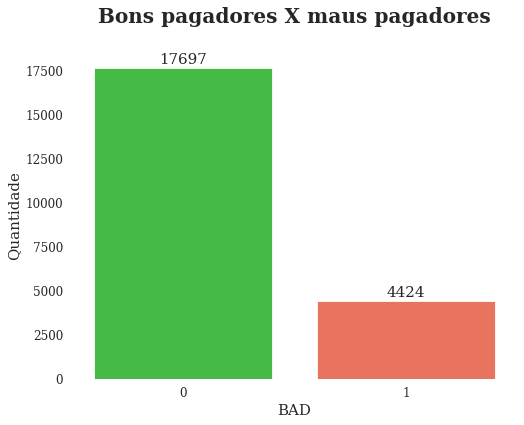

In [154]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df['BAD'], palette=['#32CD32', '#FF6347'])
plt.title('Bons pagadores X maus pagadores\n', fontsize=20, fontweight='bold', fontfamily='serif')
plt.xticks(fontsize=12, fontfamily='serif')
plt.yticks(fontsize=12, fontfamily='serif')
plt.xlabel('BAD', fontsize=15, fontfamily='serif')
plt.ylabel('Quantidade', fontsize=15, fontfamily='serif')
for b in ax.patches:
  ax.annotate(f'{b.get_height()}', (b.get_x()+0.4, b.get_height()+200), ha='center', fontfamily='serif', fontsize=15)

plt.box(False)

Observa-se que os dados da variável-alvo estão muito desbalanceados, sendo X% inadimplente e Y% não-inadimplente

In [69]:
variaveis_numericas = ['age', 'bestPaymentDay', 'monthsInResidence','monthsInTheJob'] # A variáveis foram selecionadas de acordo com seu tipo + testes com os gráficos + interpretação teórica
variaveis_naonumericas = ['gender','maritalStatus', 'residenceType']

Verificando **idade**, **melhor dia de pagamento**, **meses em casa** e **meses no trabalho**

**Histograma**

---
O histograma, também conhecido como distribuição de frequências, é a representação gráfica em colunas ou em barras de um conjunto de dados previamente tabulado e dividido em classes uniformes ou não uniformes. A base de cada retângulo representa uma classe.

[FONTE](https://pt.wikipedia.org/wiki/Histograma)

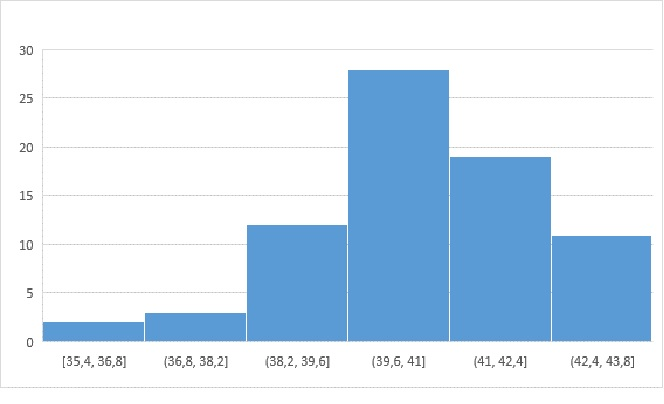


Veremos como estão distribuídos nossos dados

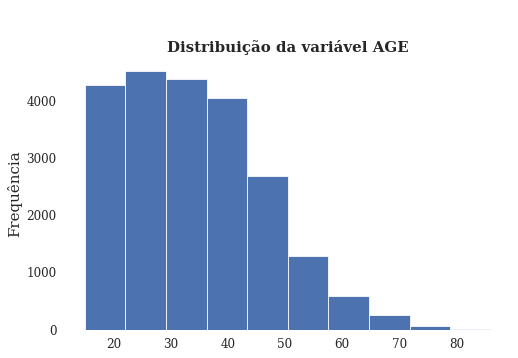

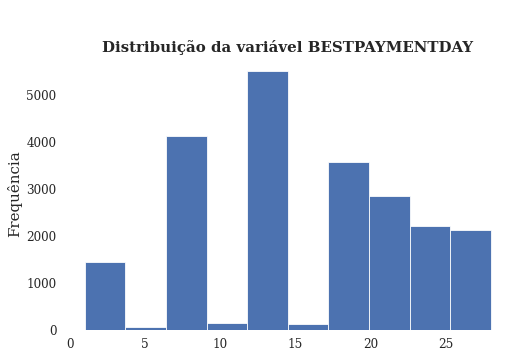

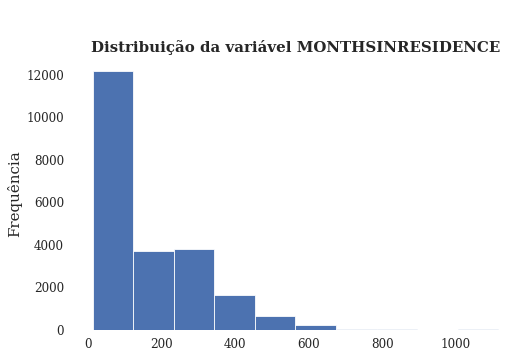

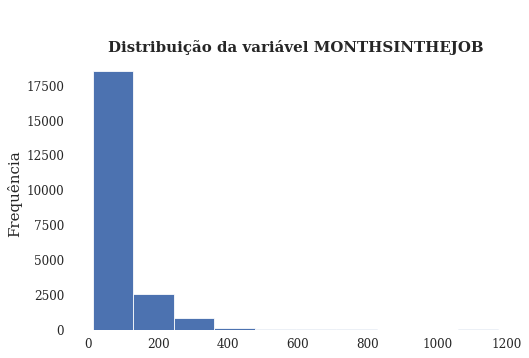

In [70]:
for i in variaveis_numericas:
  plt.figure(figsize=(8,5))
  df[i].plot(kind='hist')
  plt.title(f'\n\nDistribuição da variável {str(i).upper()}', fontfamily='serif', fontsize=15, fontweight='bold')
  plt.box(False)
  plt.xticks(fontsize=12,fontfamily='serif')
  plt.yticks(fontsize=12,fontfamily='serif')
  plt.xlabel('')
  plt.ylabel('Frequência',fontsize=15,fontfamily='serif')
  plt.show()

Ainda podemos plotar o mesmo histograma, separando pelas saídas da coluna "BAD", assim verificamos os histogramas para **inadimplentes** X **não-inadimplentes**

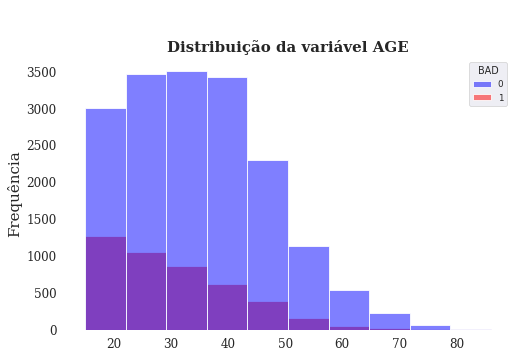

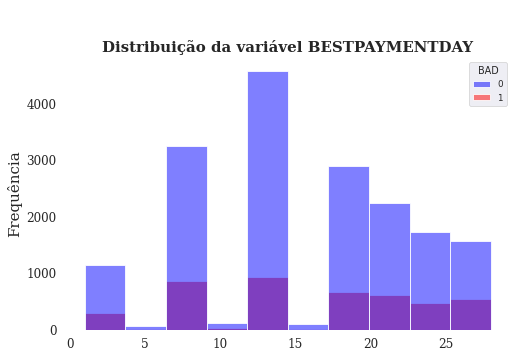

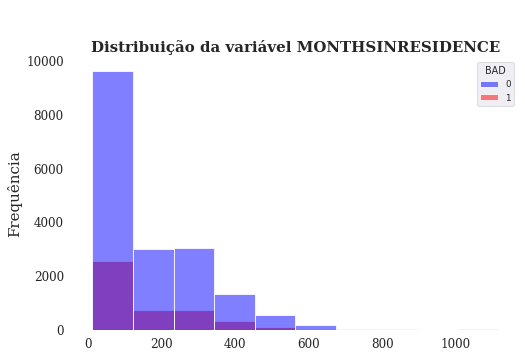

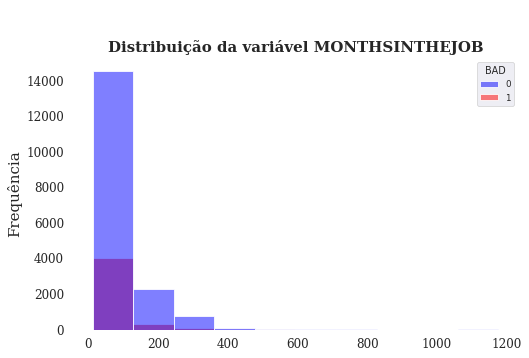

In [71]:
for i in variaveis_numericas:
  plt.figure(figsize=(8,5))
  sns.histplot(x=i, hue='BAD', data=df, bins=10, palette=['Blue', 'Red'])
  plt.title(f'\n\nDistribuição da variável {str(i).upper()}', fontfamily='serif', fontsize=15, fontweight='bold')
  plt.box(False)
  plt.xticks(fontsize=12,fontfamily='serif')
  plt.yticks(fontsize=12,fontfamily='serif')
  plt.xlabel('')
  plt.ylabel('Frequência',fontsize=15,fontfamily='serif')
  plt.show()

Podemos observar que a distribuição é bem parecida

Outra maneira de visualizar essas informações é plotando um gráfico de contagem

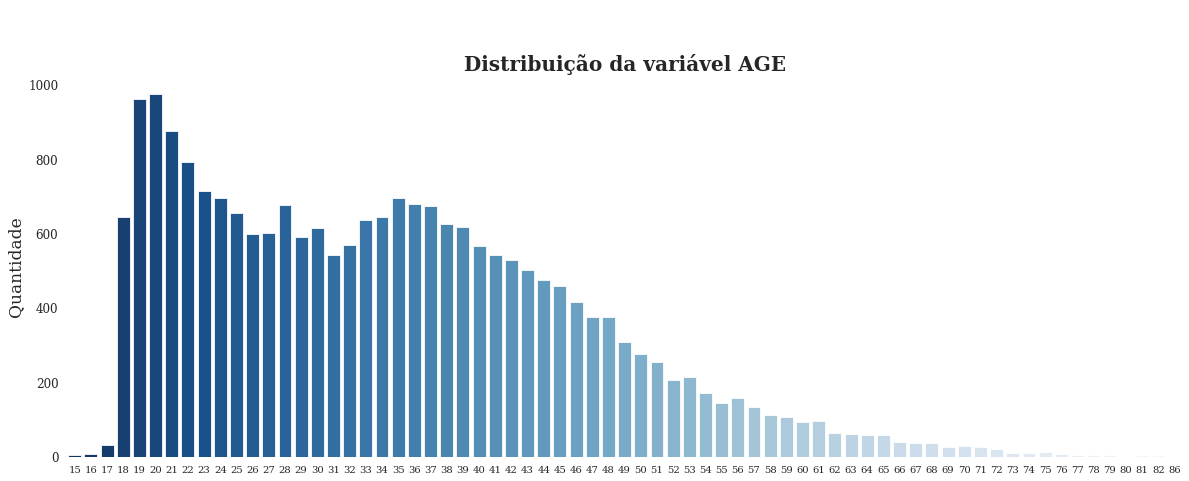

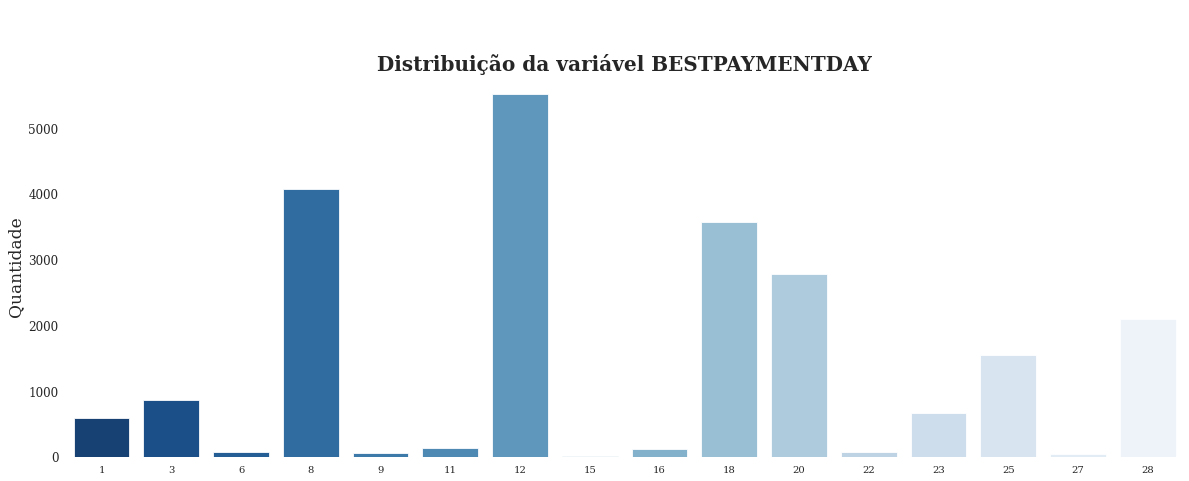

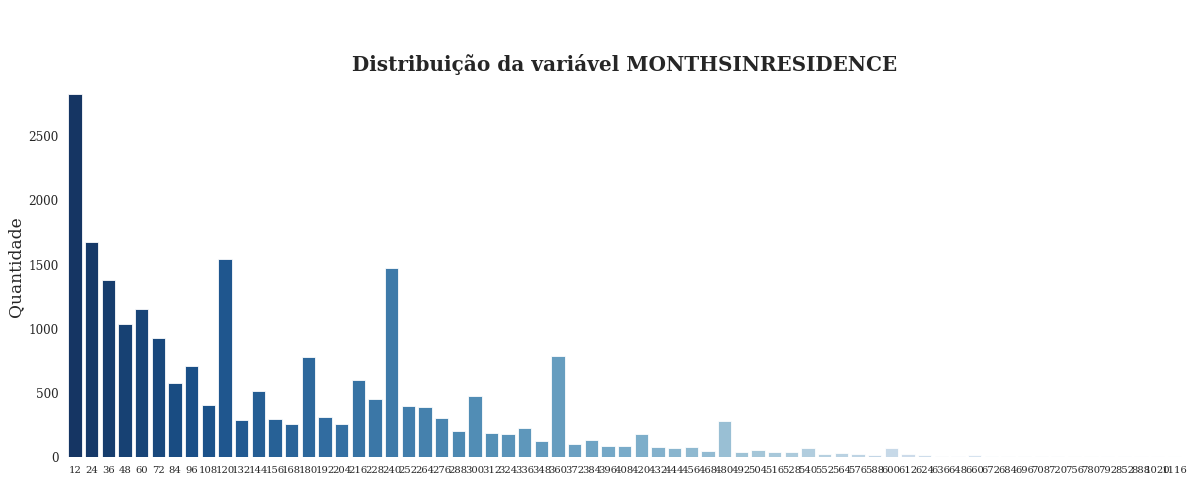

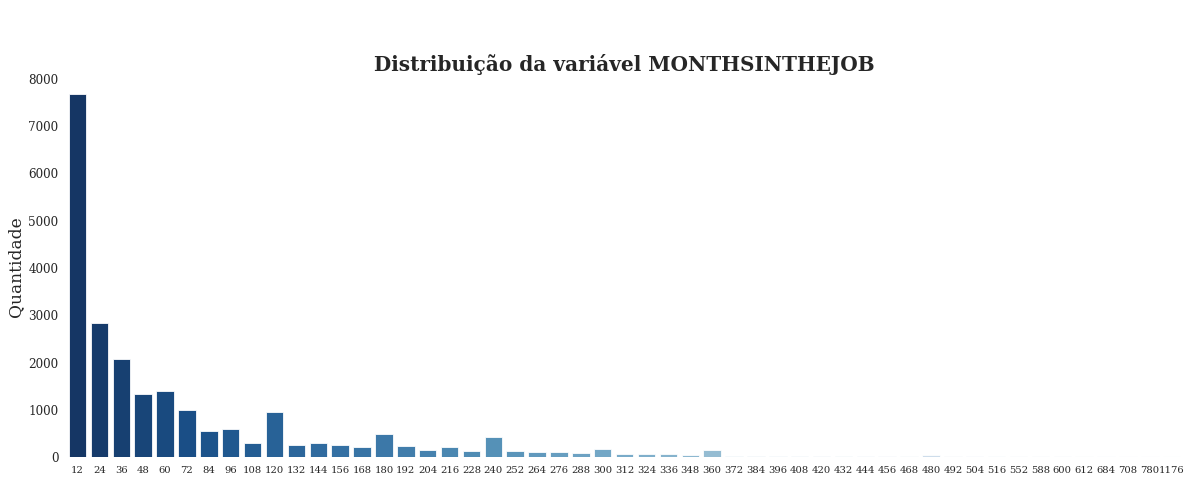

In [155]:
for i in variaveis_numericas:
  plt.figure(figsize=(20,7))
  ax = sns.countplot(df[i], palette='Blues_r')
  plt.title(f'\n\nDistribuição da variável {str(i).upper()}', fontfamily='serif', fontsize=20, fontweight='bold')
  plt.box(False)
  plt.xticks(fontsize=10,fontfamily='serif')
  plt.yticks(fontsize=12, fontfamily='serif')
  plt.xlabel('')
  plt.ylabel('Quantidade',fontsize=17,fontfamily='serif')
  plt.show()

Agora plotaremos os gráficos das variáveis não-numéricas para observar seu comportamento

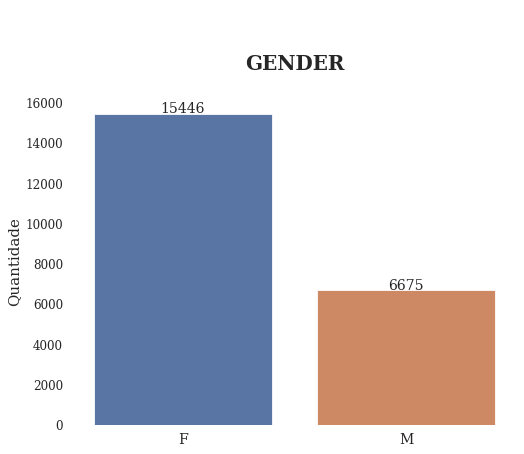

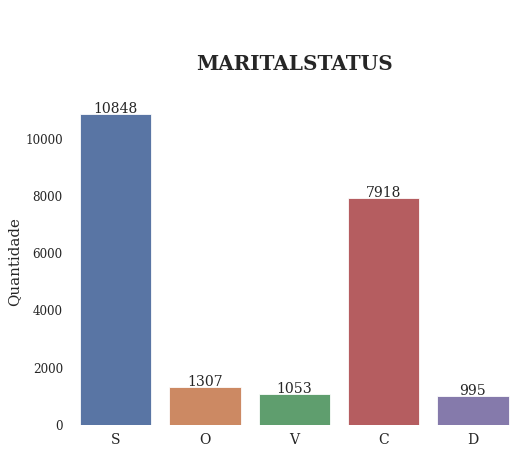

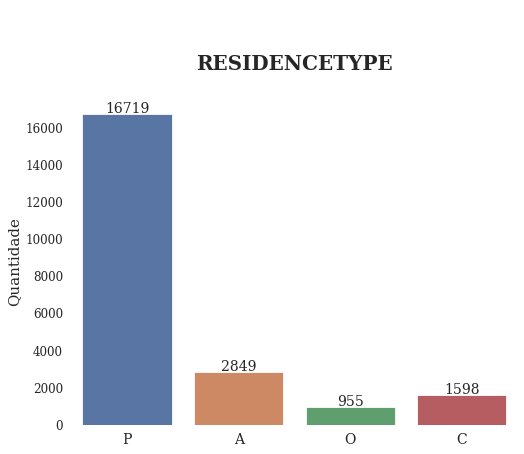

In [73]:
for i in variaveis_naonumericas:
  plt.figure(figsize=(8,6))
  ax = sns.countplot(df[i])
  plt.title(f'\n\n{str(i).upper()}\n', fontfamily='serif', fontsize=20, fontweight='bold')
  plt.box(False)
  plt.xticks(fontsize=14,fontfamily='serif')
  plt.xlabel('')
  plt.yticks(fontsize=12,fontfamily='serif')
  plt.ylabel('Quantidade',fontsize=15,fontfamily='serif')
  for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()+50), ha='center', fontfamily='serif', fontsize=14)
  plt.show()

**Boxplot**

---
Em estatística descritiva, diagrama de caixa, diagrama de extremos e quartis, boxplot ou box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis.

[FONTE](https://pt.wikipedia.org/wiki/Diagrama_de_caixa)


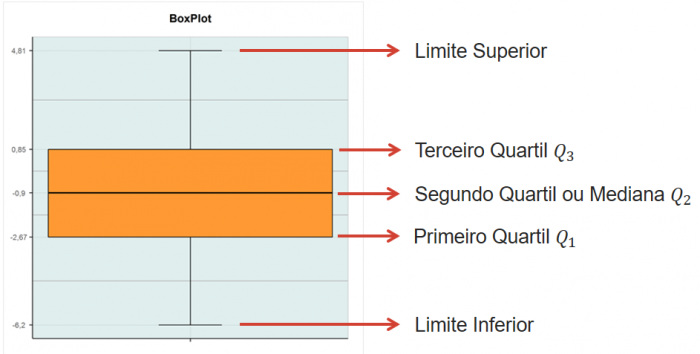

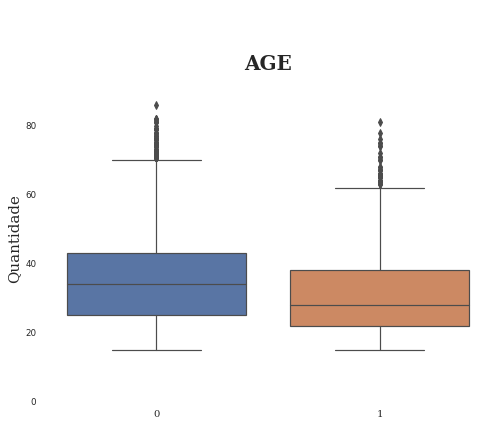

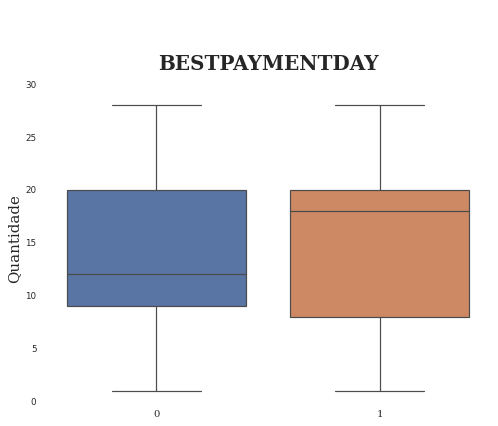

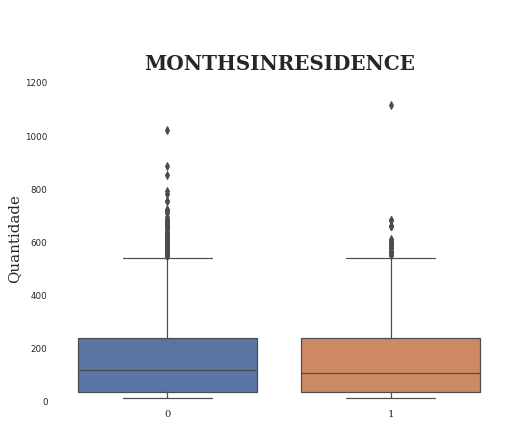

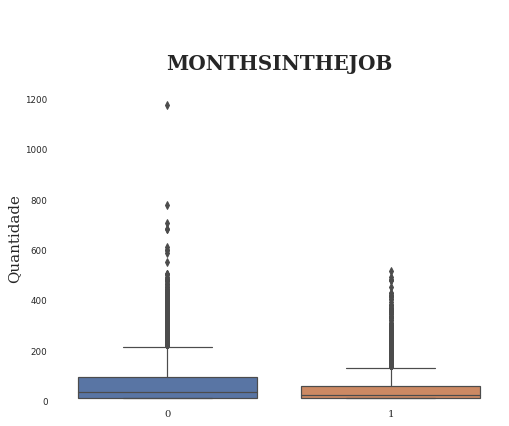

In [74]:
for i in variaveis_numericas:
  plt.figure(figsize=(8,6))
  sns.boxplot(x = df['BAD'], y = df[i])
  plt.title(f'\n\n{str(i).upper()}', fontfamily='serif', fontsize=20, fontweight='bold')
  plt.box(False)
  plt.xticks(fontsize=10,fontfamily='serif')
  plt.xlabel('')
  plt.ylim(0, df[i].max()*1.1)
  plt.ylabel('Quantidade',fontsize=15,fontfamily='serif')
  plt.show()

### Correlações

---
Em estatística, a correlação é uma relação estatística de dependência entre duas variáveis.

**Um guia para interpretar correlações:**

Utilizaremos a [correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) nessa análise, ela se encaixa melhor com o objetivo do projeto.
* **1.0** positivo ou negativo indica uma correlação perfeita
* **0.9** positivo ou negativo indica uma correlação muito forte.
* **0.7 a 0.9** positivo ou negativo indica uma correlação forte.
* **0.5 a 0.7** positivo ou negativo indica uma correlação moderada.
* **0.3 a 0.5** positivo ou negativo indica uma correlação fraca.
* **0.1 a 0.3** positivo ou negativo indica uma correlação desprezível.
* **0** indica uma correlação inexistente


conseguimos exibir uma tabela de correlação utilizando **corr()**

In [75]:
df.corr()

,clientId,age,areaCodeResidencialPhone,bestPaymentDay,shopRank,monthsInResidence,monthsInTheJob,professionCode,mateIncome,personalNetIncome,BAD
clientId,1.000000,0.006466,0.001252,0.014442,-0.012410,-0.000676,-0.000272,-0.010905,0.000966,-0.001836,0.005189
age,0.006466,1.000000,-0.009227,0.000399,-0.033958,0.244218,0.473084,-0.083579,0.054989,-0.010840,-0.150679
areaCodeResidencialPhone,0.001252,-0.009227,1.000000,0.026797,-0.006432,0.011929,-0.016350,-0.034784,-0.007522,-0.007225,0.077238
bestPaymentDay,0.014442,0.000399,0.026797,1.000000,0.010826,0.014927,-0.024214,-0.020415,0.005136,-0.002925,0.033853
shopRank,-0.012410,-0.033958,-0.006432,0.010826,1.000000,-0.003504,-0.019225,0.002510,-0.007887,-0.001340,0.006480
monthsInResidence,-0.000676,0.244218,0.011929,0.014927,-0.003504,1.000000,0.126555,-0.002432,-0.017947,0.000065,-0.028790
monthsInTheJob,-0.000272,0.473084,-0.016350,-0.024214,-0.019225,0.126555,1.000000,-0.058893,0.038886,-0.010085,-0.111577
professionCode,-0.010905,-0.083579,-0.034784,-0.020415,0.002510,-0.002432,-0.058893,1.000000,-0.002010,0.006063,0.027381
mateIncome,0.000966,0.054989,-0.007522,0.005136,-0.007887,-0.017947,0.038886,-0.002010,1.000000,-0.002300,-0.037054
personalNetIncome,-0.001836,-0.010840,-0.007225,-0.002925,-0.001340,0.000065,-0.010085,0.006063,-0.002300,1.000000,0.002241


Podemos exibir essas mesmas informações de uma maneira mais simples e elegante

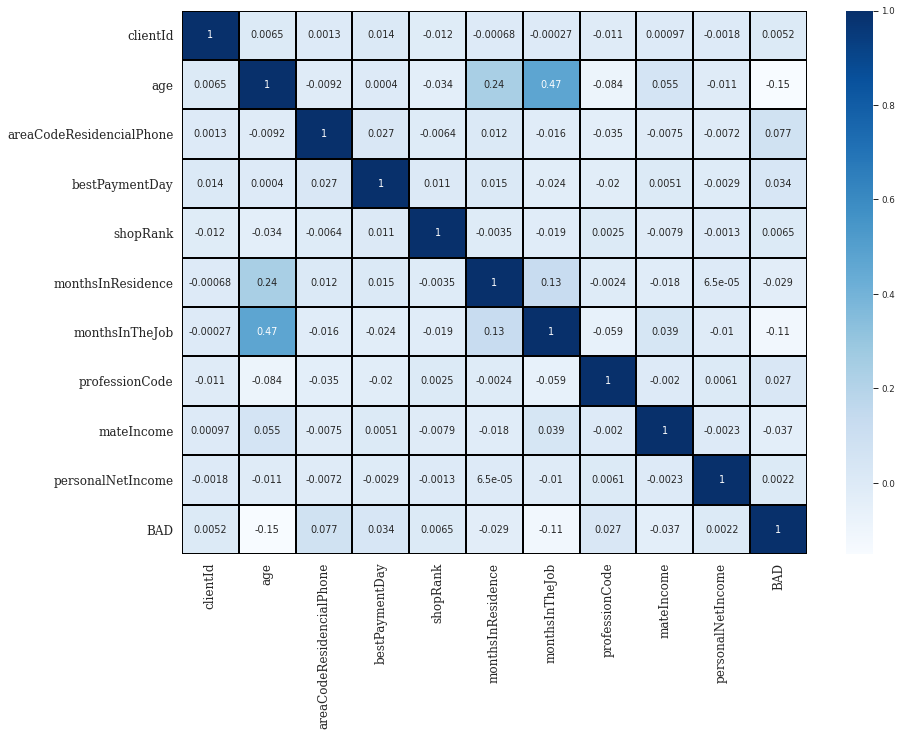

In [157]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidth=1, linecolor='Black')
plt.xticks(fontsize=12, fontfamily='serif')
plt.yticks(fontsize=12, fontfamily='serif');

Bem melhor, não?! Mas podemos observar baixíssimas correlações nos dados, sendo a maior entre "age" e "monthsinThejob" (**0.47**)

Agora vamos limitar nossa análise. Olharemos a correlação para a nossa variável-alvo

In [77]:
df.corr()['BAD']

clientId                    0.005189
age                        -0.150679
areaCodeResidencialPhone    0.077238
bestPaymentDay              0.033853
shopRank                    0.006480
monthsInResidence          -0.028790
monthsInTheJob             -0.111577
professionCode              0.027381
mateIncome                 -0.037054
personalNetIncome           0.002241
BAD                         1.000000
Name: BAD, dtype: float64

Usando o heatmap

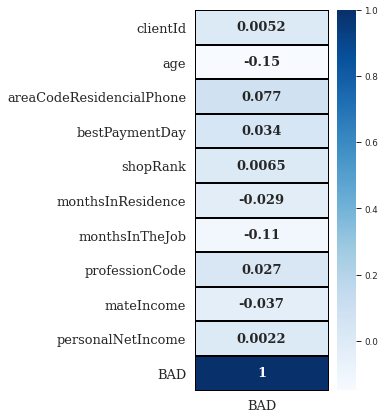

In [78]:
plt.figure(figsize=(3,7))
sns.heatmap(df.corr()[10:].T, annot = True, linewidths=1,linecolor='Black', cmap='Blues', annot_kws={"fontsize":"13", "fontfamily":"serif", "fontweight":"bold"})
plt.yticks(fontsize=13, fontfamily='serif')
plt.xticks(fontsize=13, fontfamily='serif');

A maior correlação com a variável "BAD" se encontra na variável "age" (**-0.15**)

## Pré-processamento

---

Agora vamos preparar os dados para serem modelados, para isso, utilizaremos algumas técnicas com a biblioteca Scikit-Learn e ibm-learn. As principais técnicas utilizadas serão **LabelEncoder** e **SMOTE**, cada uma com uma finalidade diferente


In [79]:
X = df.drop(columns='BAD')
Y = df['BAD'] #A inadimplência será nossa variável-alvo

In [80]:
df.columns

Index(['clientId', 'gender', 'maritalStatus', 'age', 'flagResidencialPhone',
       'areaCodeResidencialPhone', 'bestPaymentDay', 'shopRank',
       'residenceType', 'monthsInResidence', 'flagMothersName',
       'flagFathersName', 'flagResidenceTown_WorkingTown',
       'flagResidenceState_WorkingState', 'monthsInTheJob', 'professionCode',
       'mateIncome', 'flagResidencialAddress_PostalAddress',
       'personalNetIncome', 'BAD'],
      dtype='object')

Aplicando label encoder para os dados discretos

In [81]:
label_X = LabelEncoder()

for i in ['gender', 'maritalStatus', 'flagResidencialPhone', 'residenceType', 'flagResidenceTown_WorkingTown', 'flagMothersName',	'flagFathersName', 'flagResidenceState_WorkingState', 'flagResidencialAddress_PostalAddress']:
  X[i] = label_X.fit_transform(X[i])

Verificando nosso dataframe das variáveis preditoras

In [82]:
X.head()

,clientId,gender,maritalStatus,age,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,shopRank,residenceType,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,personalNetIncome
Id,,,,,,,,,,,,,,,,,,,
1,2,0,3,18,1,31,20,0,3,216,1,1,1,1,12,853,0.0,1,300.0
14,18,1,2,44,1,31,8,0,3,72,1,1,1,1,12,135,0.0,1,370.0
15,19,0,4,46,0,50,12,0,3,360,1,1,0,1,120,704,0.0,1,520.0
16,20,1,3,20,1,31,28,0,3,24,1,1,1,1,12,999,0.0,1,500.0
20,24,0,3,46,1,31,8,0,0,48,1,1,1,1,192,999,0.0,1,3100.0


Isso aconteceu por causa do desbalanceamento dos dados, como vimos no início da análise exploratória. Então vamos **balancear os dados** utilizando a técnica **SMOTE**. Um paper que explica muito bem sobre a técnica é o [SMOTE: Synthetic Minority Over-sampling Technique](http://scholar.google.com.br/scholar_url?url=https://www.jair.org/index.php/jair/article/download/10302/24590&hl=pt-BR&sa=X&ei=R7EiYJCUKZLGmgHPtIiYAw&scisig=AAGBfm0zNdcfXdPynWxoQ3FsFum2KdF9ow&nossl=1&oi=scholarr)

In [83]:
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

Plotando o novo gráfico comparando a quantidade de inadimplente X não-inadimplentes

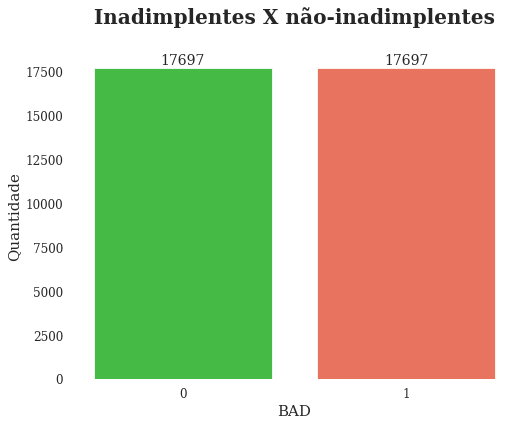

In [146]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.countplot(Y_res, palette=['#32CD32', '#FF6347'])
plt.title('Inadimplentes X não-inadimplentes\n', fontsize=20, fontweight='bold', fontfamily='serif')
plt.xticks(fontsize=12, fontfamily='serif')
plt.yticks(fontsize=12, fontfamily='serif')
plt.xlabel('BAD', fontsize=15, fontfamily='serif')
plt.ylabel('Quantidade', fontsize=15, fontfamily='serif')
for b in ax.patches:
  ax.annotate(f'{b.get_height()}',(b.get_x()+0.4, b.get_height()+200), fontsize=14, fontfamily='serif', ha='center')

plt.box(False)

In [85]:

for i in ['age', 'bestPaymentDay','monthsInResidence', 'monthsInTheJob']:
  padro = MaxAbsScaler()
  padro.fit(np.array(X[i]).reshape(-1,1))
  X[i] = padro.transform(np.array(X[i]).reshape(-1,1))

## Modelagem e avaliação

---
Nessa etapa vamos modelar e avaliar nossos dados, o objetivo é classificar se um cliente é inadimplente ou não, de acordo com suas características no dataset.

Durante o processo de criação de um modelo de machine learning nós precisamos medir a qualidade dele de acordo com o objetivo da tarefa. Existem funções matemáticas que nos ajudam a avaliar a capacidade de erro e acerto dos nossos modelos, e agora você conhecerá algumas das mais utilizadas. No artigo, usarei a palavra métrica para me referir a essas funções.

Tão importante quanto saber escolher um bom modelo, é saber escolher a métrica correta para decidir qual é o melhor entre eles.

Existem métricas mais simples, outras mais complexas, algumas que funcionam melhor para datasets com determinadas características, ou outras personalizadas de acordo com o objetivo final do modelo.

Ao escolher uma métrica deve-se levar em consideração fatores como a proporção de dados de cada classe no dataset e o objetivo da previsão (probabilidade, binário, ranking, etc). Por isso é importante conhecer bem a métrica que será utilizada, já que isso pode fazer a diferença na prática.

Nenhuma destas funções é melhor do que as outras em todos os casos. É sempre importante levar em consideração a aplicação prática do modelo. O objetivo deste artigo não é ir a fundo em cada uma delas, mas apresentá-las para que você possa pesquisar mais sobre as que achar interessante.

[FONTE](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/)


**Sobre os modelos**

---
* **Gradient Boosting Classifier**: é uma técnica de aprendizado de máquina para problemas de classificação, que produz um modelo de previsão na forma de um conjunto de modelos de previsão fracos, geralmente árvores de decisão. Ele constrói o modelo em etapas, como outros métodos de reforço, e os generaliza, permitindo a otimização de uma função de perda diferenciável arbitrária. ([LINK](https://medium.com/equals-lab/uma-breve-introdu%C3%A7%C3%A3o-ao-algoritmo-de-machine-learning-gradient-boosting-utilizando-a-biblioteca-311285783099#:~:text=Gradient%20Boosting,-O%20algoritmo%20Gradient&text=O%20objetivo%20do%20algoritmo%20%C3%A9,chamado%20de%20taxa%20de%20aprendizagem.))

* **Logistic Regression**: A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias. ([LINK](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica))

* **Ada Boost Classifier**: Adaptive boosting or AdaBoost é um dos mais simples algoritmos de boosting. Geralmente são usadas DecisionTrees como estimadores base. Neste algoritmo múltiplos modelos sequenciais são criados, sendo que cada novo modelo tenta corrigir os erros do último modelo. O AdaBoost atribui pesos a observações que foram incorretamente preditas e força o modelo seguinte a prever esses valores de forma correta. ([LINK](https://medium.com/@isnardgurgel/guia-de-bolso-para-ensemble-methods-a97700c66622))





            GRADIENTBOOSTINGCLASSIFIER



Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.7927    0.9896    0.8803      5294
           1     0.9863    0.7427    0.8473      5325

    accuracy                         0.8658     10619
   macro avg     0.8895    0.8662    0.8638     10619
weighted avg     0.8898    0.8658    0.8638     10619



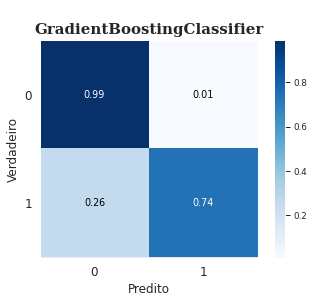

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



            LOGISTICREGRESSION



Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.5230    0.2662    0.3528      5294
           1     0.5098    0.7587    0.6098      5325

    accuracy                         0.5131     10619
   macro avg     0.5164    0.5124    0.4813     10619
weighted avg     0.5164    0.5131    0.4817     10619



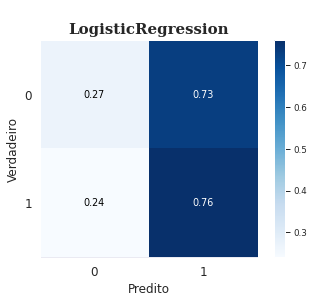

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



            RANDOMFORESTCLASSIFIER



Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      5294
           1     1.0000    1.0000    1.0000      5325

    accuracy                         1.0000     10619
   macro avg     1.0000    1.0000    1.0000     10619
weighted avg     1.0000    1.0000    1.0000     10619



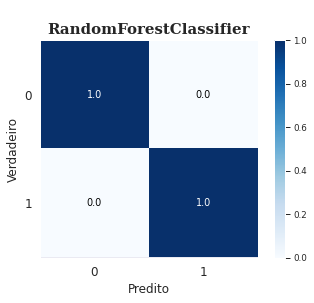

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



            ADABOOSTCLASSIFIER



Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.7747    0.9437    0.8509      5294
           1     0.9285    0.7271    0.8156      5325

    accuracy                         0.8351     10619
   macro avg     0.8516    0.8354    0.8332     10619
weighted avg     0.8518    0.8351    0.8332     10619



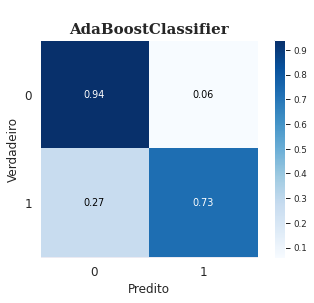

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [151]:
#Selecionando os modelos
modelos = [GradientBoostingClassifier(), LogisticRegression(), RandomForestClassifier(), AdaBoostClassifier()]

#Fazendo o resample dos dados desbalanceados
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

#Separando dados em treino e teste. Com 70% para dados de treino
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_res,Y_res, train_size=0.7, shuffle=True, random_state=42)

for modelo in modelos:
  modelo.fit(X_res, Y_res)
  previsao = modelo.predict(X_teste)
  print(f'\n\n\n            {str(modelo).upper().split("(")[0]}\n\n\n')
  print("Relatório de Classificação:\n", classification_report(Y_teste, previsao, digits=4))
  skplt.metrics.plot_confusion_matrix(Y_teste, previsao, normalize=True,cmap='Blues')
  plt.title(f'\n{str(modelo).split("(")[0]}',fontsize=15, fontfamily='serif', fontweight='bold')
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.xlabel('Predito',fontsize=12)
  plt.ylabel('Verdadeiro',fontsize=12)
  plt.show()
  print('---------------------'*10)


O modelo **GradientBoostingClassifier** se mostrou o mais adequado para o conjunto de dados.

### Curva ROC

---

A curva **ROC** mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

O valor do **AUC** varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.
Quanto maior o AUC, melhor.

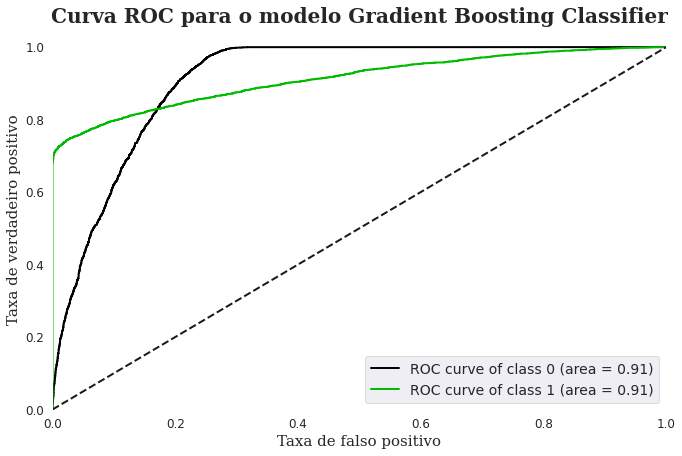

In [150]:
modelo_selec = 'Gradient Boosting Classifier'
skplt.metrics.plot_roc(Y_teste, previsao_proba, plot_macro=False, plot_micro=False, figsize=(11,7))
plt.title(f'Curva ROC para o modelo {modelo_selec}', fontfamily='serif', fontsize=20, fontweight='bold')
plt.ylabel('Taxa de verdadeiro positivo', fontfamily='serif', fontsize=15)
plt.xlabel('Taxa de falso positivo', fontfamily='serif', fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.box(False)

### Importância das variáveis

In [139]:
def plotar_importance():
  importance = modelo.feature_importances_
  colunas = X.columns
  df_feat = pd.DataFrame(importance, index=colunas)
  df_feat2 = df_feat.T

  xx = df_feat2.columns.tolist()
  yy = df_feat2.values.tolist()
  yy = yy[0]
  dici = dict(zip(xx,yy))
  dici = sorted(dici.items(), key= lambda x: x[1], reverse=True)
  dici

  lista_x = []
  lista_y = []
  for i in range(0,len(dici)):
    lista_x.append(dici[i][1])
    lista_y.append(dici[i][0])

  fig = plt.figure(figsize=(11,10))
  sns.barplot(lista_x, lista_y, palette='Blues_r')
  plt.box(False)
  plt.title(f'Importância das variáveis para o modelo {modelo_selec}\n', fontsize=20, fontfamily='serif', fontweight='bold')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13, fontfamily='serif');

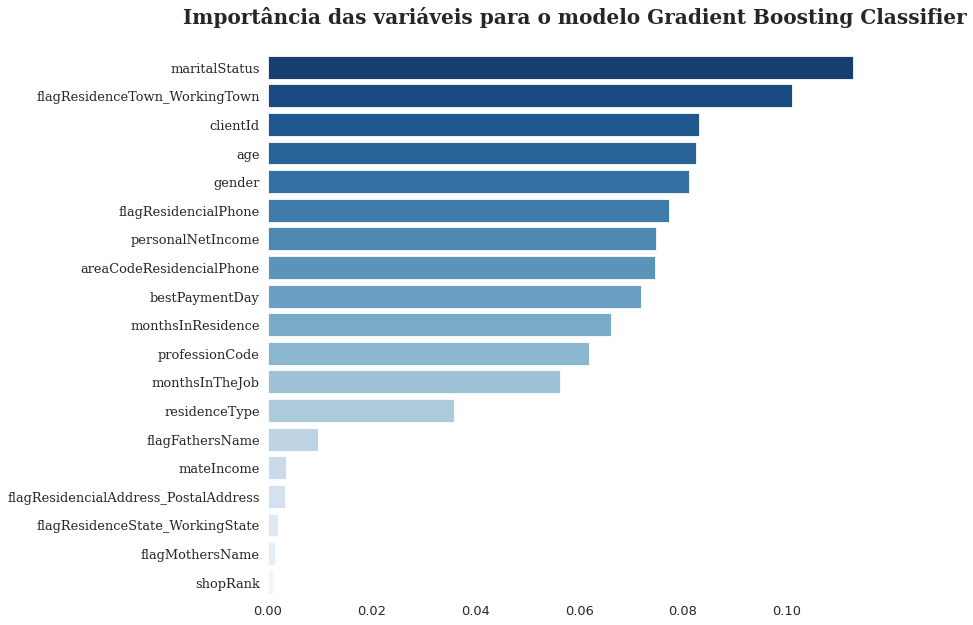

In [140]:
plotar_importance()

# Conclusão

Ao longo desse notebook construímos uma linha de pensamento para resolver o problema de **credit scoring da Mutual**. Seguimos uma metodologia específica para resolução de problemas em ciência de dados. Conseguimos seguir todos os passos e desenvolver conhecimento sobre o problema a ser resolvido.

O problema de negócio com o qual nos deparamos foi sendo melhor entendido com o avanço da Análise Exploratória dos dados, pois conseguimos obter insights importantes para a construção do modelo. utilizei técnicas estatísticas simples para desenvolver tal análise, focando na facilidade de entendimento, na simplicidade dos gráficos e no resultado a ser obtido.

O modelo que melhor se adequou ao conjunto de dados pré-processados foi o **Gradient Boosting Classifier**, um poderoso modelo que vem sendo utilizado por muito competidores da plataforma Kaggle. Após a modelagem e os resultados básicos (as métricas do relatório de classificação e a matriz de confusão), plotamos a curva ROC com informações sobre a área abaixo da curva, e a importância das variáveis para o modelo selecionado.

Essas métricas nos mostraram bons resultados acerca do modelo. Em resumo, temos:

* Verdadeiro não-inadimplente: **0.99**
* verdadeiro inadimplente: **0.74**
* Falso não-inadimplente: **0.26**
* Falso inadimplente: **0.01**
* AUC: **0.91**

* Top **5** variáveis importantes

Variável   | Importância
:---------: | :------:
maritalStatus | **0.112673**
flagResidenceTown_WorkingTown	 | **0.101051**
clientId | **0.083061**
age | **0.082492**
gender | **0.081225**